# <center>Discrete Probability Distributions</center>
## <center>PMF and CDF, Expected Value and Variance </center>


## <center>Learning Outcomes</center><br>
<center> Students know and can apply Probability Mass and Cumulative Density Functions to find likelihood of events occurring in the population, explain the relationship between statistics and parameters, use specific distribution functions for Bernoulli, Binomial, and Poisson scenarios to find likelihood of events. </center>

<center>Import libraries.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from itertools import *

## One Die

In [2]:
die = [1,2,3,4,5,6]

What are the possible outcomes? How many ways can they occur?

In [3]:
outcomes = dict(Counter(die))
outcomes

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}

What are the probabilities of each outcome?

In [4]:
probs = np.divide(list(outcomes.values()),len(outcomes))
probs

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

What if we want to plot the probabilities?

### PMF - Probability Mass Function

Function to plot PMF.

In [5]:
def plot_pmf(outcomes, probs, xlabel, title):
    plt.figure(figsize=(10,10))
    plt.plot(list(outcomes),probs, 'ro', ms=12, mec='g', color='green')
    plt.vlines(list(outcomes),0,probs)
    plt.ylabel('Prob')
    plt.xlabel(xlabel)
    plt.xticks(list(outcomes))
    plt.title(title)
    plt.show()

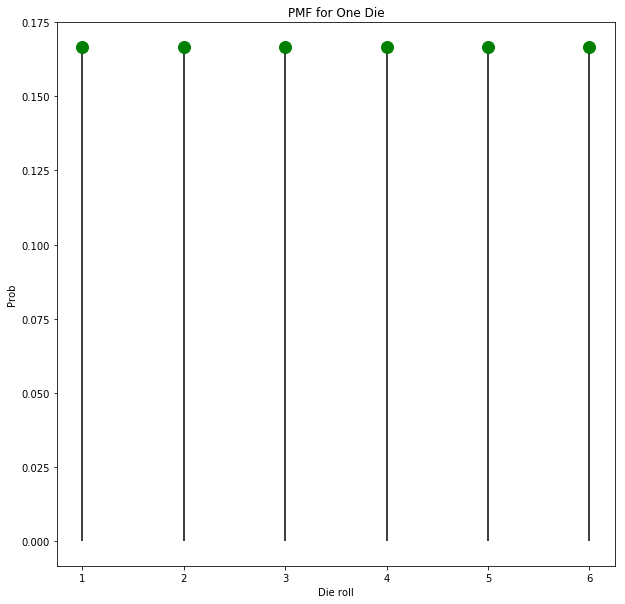

In [6]:
plot_pmf(die, probs, 'Die roll', 'PMF for One Die')

What are the odds of rolling a 1 or 2? What about rolling 4 or less?

### CDF - Cumulative Distribution Function

In [7]:
cumulative_probs = np.cumsum(probs)
print('Cumulative probabilities:', cumulative_probs)

Cumulative probabilities: [0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


In [8]:
def plot_cdf(outcomes, cumulative_probs, xlabel, title):
    plt.figure(figsize=(10,10))
    plt.plot(list(outcomes),cumulative_probs, 'ro', ms=12, mec='g', color='green')
    plt.step(list(outcomes), cumulative_probs, color='green', where='post')
    plt.ylabel('Prob')
    plt.xlabel(xlabel)
    plt.xticks(list(outcomes))
    plt.title(title)

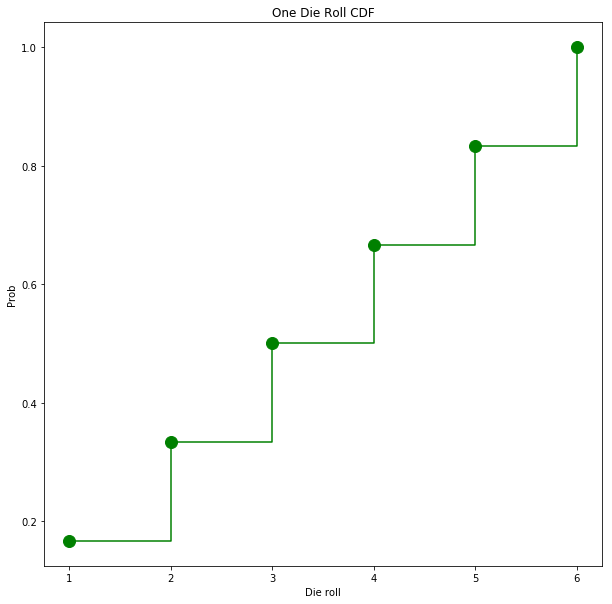

In [9]:
plot_cdf(die, cumulative_probs, 'Die roll', 'One Die Roll CDF')

What can I expect to get on average when I roll one die?

### Expected Value

In [10]:
expected_value = np.sum(np.multiply(list(outcomes),probs))
print('Expected Value:',expected_value)

Expected Value: 3.5


How close to the expected value will each dice roll be?

### Variance and Standard Deviation

In [11]:
squared_differences = np.subtract(die,expected_value)**2
variance = np.sum(squared_differences)/6
print('Variance:',variance)

Variance: 2.9166666666666665


In [12]:
np.var(die)

2.9166666666666665

In [13]:
std = np.sqrt(variance)
print('Standard Deviation:', std)

Standard Deviation: 1.707825127659933


Bringing it all together in a table.

In [14]:
## takes in a list of outcome values and the corresponding probablities
## outputs a probability distribution table
def distribution_stats(outcomes, probs):
    ev = np.sum(np.multiply(outcomes,probs))
    df = pd.DataFrame()
    for outcome,prob in zip(outcomes,probs):
        df[outcome]=[prob, outcome*prob, outcome-ev, (outcome-ev)**2, (outcome-ev)**2*prob]
    df.set_index(pd.Series(['P(x)', 'E(X)', 'X-E(X)', '(X-E(X))^2', '(X-E(X))^2*P(x)']), inplace=True)
    df['Sum']=df.sum(axis=1)
    df_sum = pd.DataFrame()
    df_sum['Variance'] = [df.iloc[-1]['Sum']]
    df_sum['Standard Deviation'] = [np.sqrt(df_sum['Variance'][0])]
    df_sum.reset_index(drop=True, inplace=True)
    display(df.round(3),df_sum.round(3))

In [15]:
distribution_stats(die, probs)

,1,2,3,4,5,6,Sum
P(x),0.167,0.167,0.167,0.167,0.167,0.167,1.000
E(X),0.167,0.333,0.500,0.667,0.833,1.000,3.500
X-E(X),-2.500,-1.500,-0.500,0.500,1.500,2.500,0.000
(X-E(X))^2,6.250,2.250,0.250,0.250,2.250,6.250,17.500
(X-E(X))^2*P(x),1.042,0.375,0.042,0.042,0.375,1.042,2.917


,Variance,Standard Deviation
0,2.917,1.708


What if the odds aren't all equal?

## Loaded Die

In [16]:
loaded_die_probs = [1/12, 1/12, 4/12, 4/12, 1/12, 1/12]

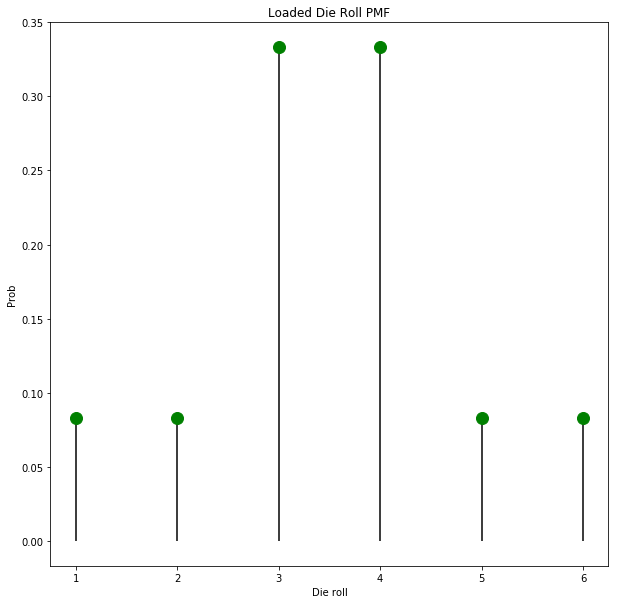

In [17]:
plot_pmf(die, loaded_die_probs, 'Die roll', 'Loaded Die Roll PMF')

In [18]:
loaded_cumulative_probs = np.cumsum(loaded_die_probs)
loaded_cumulative_probs

array([0.08333333, 0.16666667, 0.5       , 0.83333333, 0.91666667,
       1.        ])

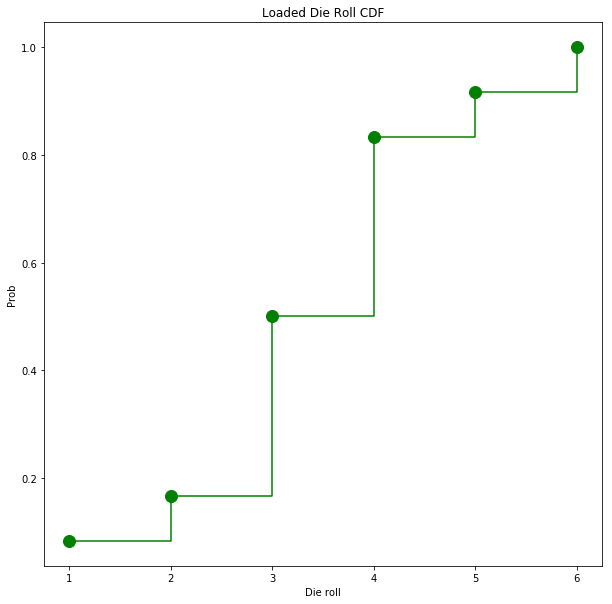

In [19]:
plot_cdf(die, loaded_cumulative_probs, 'Die roll', 'Loaded Die Roll CDF')

In [20]:
distribution_stats(die, loaded_die_probs)

,1,2,3,4,5,6,Sum
P(x),0.083,0.083,0.333,0.333,0.083,0.083,1.000
E(X),0.083,0.167,1.000,1.333,0.417,0.500,3.500
X-E(X),-2.500,-1.500,-0.500,0.500,1.500,2.500,0.000
(X-E(X))^2,6.250,2.250,0.250,0.250,2.250,6.250,17.500
(X-E(X))^2*P(x),0.521,0.187,0.083,0.083,0.188,0.521,1.583


,Variance,Standard Deviation
0,1.583,1.258


Same expected value, difference variance.

## Two Dice

In [21]:
[x for x in product(die,repeat=2)]

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [22]:
two_dice_sums = [np.sum(i) for i in [x for x in product(die,repeat=2)]]
two_dice_sums

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

In [23]:
two_dice_outcomes = dict(Counter(two_dice_sums))
two_dice_outcomes

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

In [24]:
two_dice_probs = np.divide(list(two_dice_outcomes.values()),len(two_dice_sums))
two_dice_probs

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

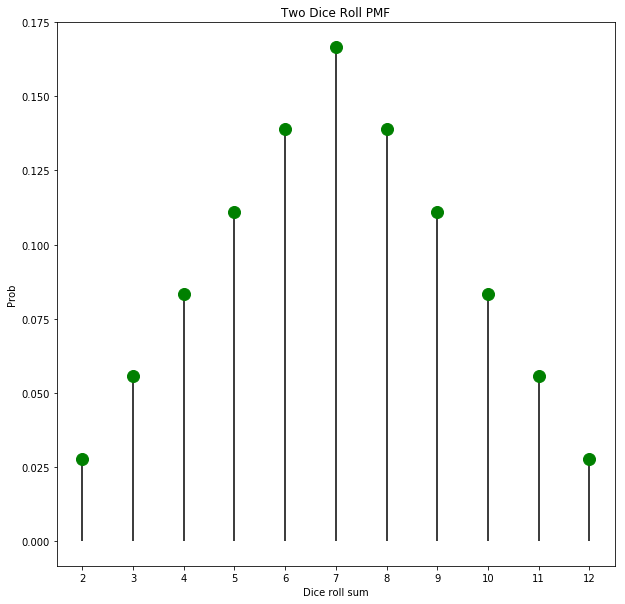

In [25]:
plot_pmf(two_dice_outcomes, two_dice_probs, 'Dice roll sum', 'Two Dice Roll PMF')

In [26]:
two_dice_cum_probs = np.cumsum(two_dice_probs)
print('Cumulative probabilities:', two_dice_cum_probs)

Cumulative probabilities: [0.02777778 0.08333333 0.16666667 0.27777778 0.41666667 0.58333333
 0.72222222 0.83333333 0.91666667 0.97222222 1.        ]


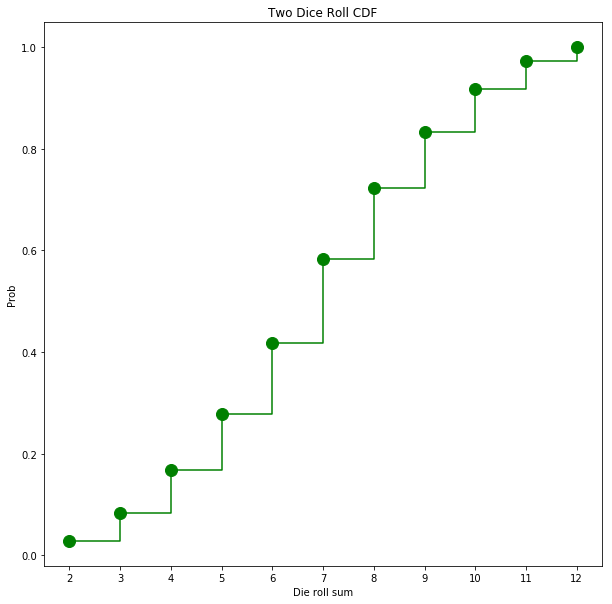

In [27]:
plot_cdf(two_dice_outcomes, two_dice_cum_probs, 'Die roll sum', 'Two Dice Roll CDF')

In [29]:
distribution_stats(list(two_dice_outcomes), two_dice_probs)

,2,3,4,5,6,7,8,9,10,11,12,Sum
P(x),0.028,0.056,0.083,0.111,0.139,0.167,0.139,0.111,0.083,0.056,0.028,1.000
E(X),0.056,0.167,0.333,0.556,0.833,1.167,1.111,1.000,0.833,0.611,0.333,7.000
X-E(X),-5.000,-4.000,-3.000,-2.000,-1.000,0.000,1.000,2.000,3.000,4.000,5.000,0.000
(X-E(X))^2,25.000,16.000,9.000,4.000,1.000,0.000,1.000,4.000,9.000,16.000,25.000,110.000
(X-E(X))^2*P(x),0.694,0.889,0.750,0.444,0.139,0.000,0.139,0.444,0.750,0.889,0.694,5.833


,Variance,Standard Deviation
0,5.833,2.415


## Three Dice

In [30]:
three_dice_sums = [np.sum(i) for i in [x for x in product(die,repeat=3)]]
three_dice_outcomes = dict(Counter(three_dice_sums))
three_dice_outcomes

{3: 1,
 4: 3,
 5: 6,
 6: 10,
 7: 15,
 8: 21,
 9: 25,
 10: 27,
 11: 27,
 12: 25,
 13: 21,
 14: 15,
 15: 10,
 16: 6,
 17: 3,
 18: 1}

In [31]:
three_dice_probs = np.divide(list(three_dice_outcomes.values()),len(three_dice_sums))
three_dice_probs

array([0.00462963, 0.01388889, 0.02777778, 0.0462963 , 0.06944444,
       0.09722222, 0.11574074, 0.125     , 0.125     , 0.11574074,
       0.09722222, 0.06944444, 0.0462963 , 0.02777778, 0.01388889,
       0.00462963])

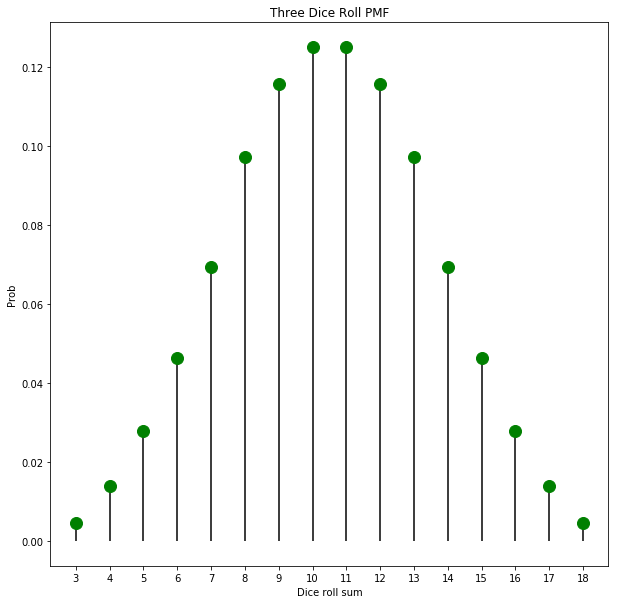

In [32]:
plot_pmf(three_dice_outcomes, three_dice_probs, 'Dice roll sum', 'Three Dice Roll PMF')

In [33]:
three_dice_cum_probs = np.cumsum(three_dice_probs)
print('Cumulative probabilities:', three_dice_cum_probs)

Cumulative probabilities: [0.00462963 0.01851852 0.0462963  0.09259259 0.16203704 0.25925926
 0.375      0.5        0.625      0.74074074 0.83796296 0.90740741
 0.9537037  0.98148148 0.99537037 1.        ]


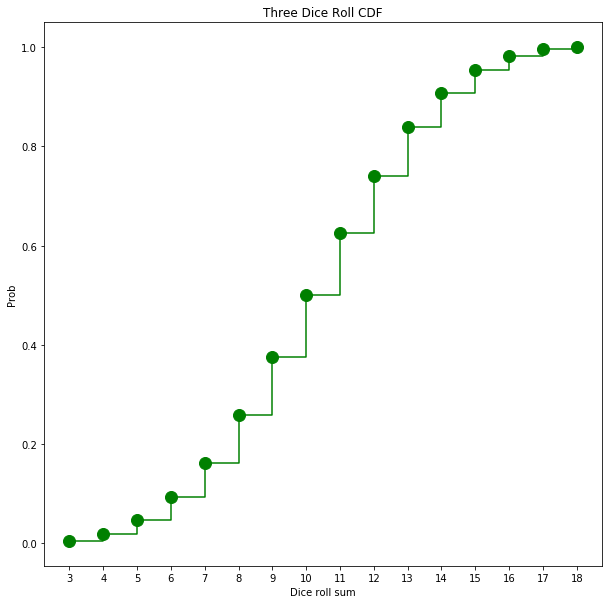

In [34]:
plot_cdf(three_dice_outcomes, three_dice_cum_probs, 'Dice roll sum', 'Three Dice Roll CDF')

In [35]:
distribution_stats(list(three_dice_outcomes), three_dice_probs)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Sum
P(x),0.005,0.014,0.028,0.046,0.069,0.097,0.116,0.125,0.125,0.116,0.097,0.069,0.046,0.028,0.014,0.005,1.00
E(X),0.014,0.056,0.139,0.278,0.486,0.778,1.042,1.250,1.375,1.389,1.264,0.972,0.694,0.444,0.236,0.083,10.50
X-E(X),-7.500,-6.500,-5.500,-4.500,-3.500,-2.500,-1.500,-0.500,0.500,1.500,2.500,3.500,4.500,5.500,6.500,7.500,0.00
(X-E(X))^2,56.250,42.250,30.250,20.250,12.250,6.250,2.250,0.250,0.250,2.250,6.250,12.250,20.250,30.250,42.250,56.250,340.00
(X-E(X))^2*P(x),0.260,0.587,0.840,0.938,0.851,0.608,0.260,0.031,0.031,0.260,0.608,0.851,0.938,0.840,0.587,0.260,8.75


,Variance,Standard Deviation
0,8.75,2.958


Suppose now we roll a die. If we roll a one, then we roll a second time. What would this probability distribution look like?

By hand.

In [36]:
outcomes = [2,3,4,5,6,7]
probs = [2/11,2/11,2/11,2/11,2/11,1/11]
print(probs)
distribution_stats(outcomes,probs)

[0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.09090909090909091]


,2,3,4,5,6,7,Sum
P(x),0.182,0.182,0.182,0.182,0.182,0.091,1.000
E(X),0.364,0.545,0.727,0.909,1.091,0.636,4.273
X-E(X),-2.273,-1.273,-0.273,0.727,1.727,2.727,1.364
(X-E(X))^2,5.165,1.620,0.074,0.529,2.983,7.438,17.810
(X-E(X))^2*P(x),0.939,0.295,0.014,0.096,0.542,0.676,2.562


,Variance,Standard Deviation
0,2.562,1.601


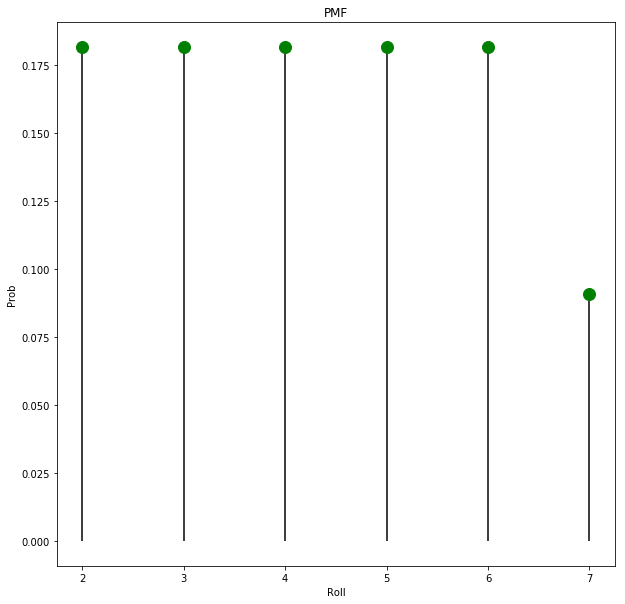

In [37]:
plot_pmf(outcomes, probs, 'Roll', 'PMF')

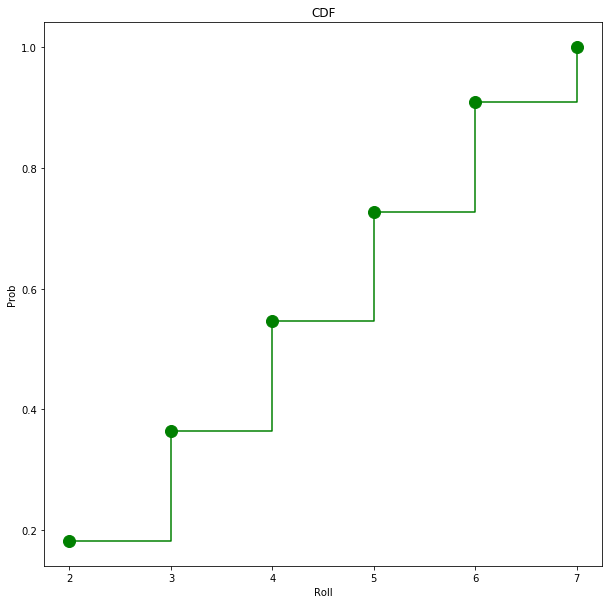

In [38]:
cum_probs = np.cumsum(probs)
plot_cdf(outcomes, cum_probs, 'Roll', 'CDF')

# Activity

You flip a coin. If it's heads, you pick a prize from box A. If it's tails, you pick a prize from box B. <br><br>
- Box A has two bags inside. One with 3 coins and one with 5 coins.<br>
- Box B has four bags inside. The bags have 1, 2, 3, and 4 coins. <br><br>

1) Build a distribution table by hand to calculate variance and standard deviation.
       Use the `distribution_stats` function to check your answer. <br> <br>
2) Graph the PMF and CDF for the outcomes.<br> <br>
3) What are the odds you get between 2 and 4 (inclusive) coins? <br><br>

<b>Bonus:</b> You now get two chances to pick a prize. What is the distribution of total tokens you will recieve assuming you don't replace the first bag you select?

In [40]:
outcomes = [1,2,3,4,5]
probs = [1/8,1/8,3/8,1/8,2/8]
print(probs)
distribution_stats(outcomes,probs)

[0.125, 0.125, 0.375, 0.125, 0.25]


,1,2,3,4,5,Sum
P(x),0.125,0.125,0.375,0.125,0.250,1.000
E(X),0.125,0.250,1.125,0.500,1.250,3.250
X-E(X),-2.250,-1.250,-0.250,0.750,1.750,-1.250
(X-E(X))^2,5.062,1.562,0.062,0.562,3.062,10.312
(X-E(X))^2*P(x),0.633,0.195,0.023,0.070,0.766,1.688


,Variance,Standard Deviation
0,1.688,1.299
